<a href="https://colab.research.google.com/github/Gabriel-Machado-GM/Online-Judge-Solutions-Python/blob/main/UVA11080.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UVA 11080 - Place the Guards

Gabriel Machado

https://onlinejudge.org/external/110/11080.pdf

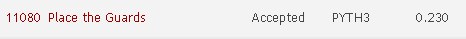

### Code Solution  ###✅#######

In [ ]:
class Vertex:
    __slots__ = '_element'


    def __init__(self, x):
        self._element = x


    def element(self):
        return self._element


    def __hash__(self):
        return hash(id(self))


class Edge:
    __slots__ = '_origin', '_destination', '_element'


    def __init__(self, u, v, x):
        self._origin = u
        self._destination = v
        self._element = x


    def endpoints(self):
        return (self._origin, self._destination)


    def opposite(self, v):
        return self._destination if v is self._origin else self._origin


    def element(self):
        return self._element


    def __hash__(self):
        return hash((self._origin, self._destination))


class Graph:
    def __init__(self, directed=False):
        self._outgoing = {}
        self._incoming = {} if directed else self._outgoing


    def is_directed(self):
        return self._incoming is not self._outgoing


    def vertex_count(self):
        return len(self._outgoing)


    def vertices(self):
        return self._outgoing.keys()


    def edges(self):
        result = set()
        for secondary_map in self._outgoing.values():
            result.update(secondary_map.values())
        return result


    def get_edge(self, u, v):
        return self._outgoing[u].get(v)


    def insert_vertex(self, x=None):
        v = Vertex(x)
        self._outgoing[v] = {}
        if self.is_directed():
            self._incoming[v] = {}
        return v


    def insert_edge(self, u, v, x=None):
        e = Edge(u, v, x)
        self._outgoing[u][v] = e
        self._incoming[v][u] = e


def min_guards_needed(graph):
    color = {}
    guards_needed = 0


    for vertex in graph.vertices():
        if vertex not in color:
            color_count = {True: 0, False: 0}
            if not bfs_check_bipartite(graph, vertex, color, color_count):
                return -1
            guards_needed += max(1, min(color_count[True], color_count[False]))


    return guards_needed


def bfs_check_bipartite(graph, start, color, color_count):
    from collections import deque


    queue = deque([(start, True)])
    color[start] = True
    color_count[True] += 1


    while queue:
        vertex, current_color = queue.popleft()
        for edge in graph._outgoing[vertex].values():
            opposite = edge.opposite(vertex)
            if opposite not in color:
                color[opposite] = not current_color
                color_count[not current_color] += 1
                queue.append((opposite, not current_color))
            elif color[opposite] == current_color:
                return False
    return True


t = int(input())


for _ in range(t):
    v_count, e_count = map(int, input().split())
    gr = Graph()


    vertices = {}
    for i in range(v_count):
        vertices[i] = gr.insert_vertex(x=i)


    for _ in range(e_count):
        f, t = map(int, input().split())
        u = vertices[f]
        v = vertices[t]
        gr.insert_edge(u, v)


    result = min_guards_needed(gr)
    print(result)

2
4 2
0 1
2 3
2
5 5
0 1
1 2
2 3
0 4
3 4
-1
